<a href="https://colab.research.google.com/github/leon-czarlinski/ProfileAnalysis/blob/main/ProfileAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Profile Analysis

In this project we will cover the concept of clustering, which is a unsupervised learning algorithm that involves grouping similar data points togethes based on their characteristics. The goal of clustering is to find similarities within a dataset and group similar data points together while keeping dissimilar data points separate.

Think of this project from a business perspective. Based on the customer profile, the business can identify different clusters and customize the experience, offers, services, products, and others based on this clusterization.

## Task 1: Understand the problem statement

When analysing a dataset, it is important to to ensure ethical analysis practices, adressing issues of bias and credibility. This is a fundamental step on the **PREPARE** stage of data analysis. For this analysis, we want to check for bias

* What is our customer profile? What is the distribution of our customers when it comes to gender, age, annual income, profession, work experience and family size?
* Is there any correlation between those features? What feature is more related to the spending score?
* How can we train an unsupervised learning algorithm that involves grouping similar data points together based on the characteristics?

The data set contains some information that will give us the answer. The dataframe has the following information:

* Customer ID
* Gender (man or woman)
* Age (in years)
* Annual income
* Spending score (0 - 100)
* Profession
* Work Experience (in years)
* Family size (>1)

## Task 2: Import libraries and datasets

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it.

In [1]:
#Data
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProfileAnalysis/customers.csv')

In [4]:
df.head(5)

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   custm_id       2000 non-null   int64 
 1   gender         2000 non-null   object
 2   age            2000 non-null   int64 
 3   annual_income  2000 non-null   int64 
 4   spend_score    2000 non-null   int64 
 5   profession     1965 non-null   object
 6   work_exp       2000 non-null   int64 
 7   fam_size       2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
df.isnull().sum()

custm_id          0
gender            0
age               0
annual_income     0
spend_score       0
profession       35
work_exp          0
fam_size          0
dtype: int64

## Task 3: Clean the data, treating missing points

Data integrity is the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. Data manipulation process involves changing the data to make it more organized and easier to read.

At this point, we discover that **35 rows** have a NaN on profession. This incomplete data that is missing in important fields can decrease productivity, innaccurate insights, or inability to complete essential analysis.

using the **.dropna()** method, we are goint to delete this rows, so we can build the analysis with a dataset with complete data.


In [8]:
df[df.isnull().any(axis=1)]

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [9]:
df[df['age'] < 18]

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
202,203,Female,16,60000,0,Engineer,6,8
210,211,Female,1,57000,93,Engineer,1,2
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
229,230,Male,15,94000,30,Healthcare,7,2
...,...,...,...,...,...,...,...,...
1974,1975,Female,14,153145,59,Healthcare,8,6
1979,1980,Male,0,165321,93,Doctor,8,1
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6


In [10]:
df[df['age'] > 90]

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
221,222,Female,95,72000,51,Engineer,4,2
223,224,Female,93,93000,37,Healthcare,1,5
236,237,Male,91,9000,96,Healthcare,1,5
237,238,Male,95,36000,35,NaN,0,4
240,241,Male,92,83000,16,Executive,1,5
...,...,...,...,...,...,...,...,...
1948,1949,Female,91,142602,64,Lawyer,7,6
1972,1973,Male,98,104249,12,Engineer,5,2
1991,1992,Female,97,129444,96,Entertainment,5,6
1992,1993,Male,94,181183,24,Marketing,9,3


In [11]:
profile_df = df.copy()
profile_df

,custm_id,gender,age,annual_income,spend_score,profession,work_exp,fam_size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


## Task 4: Perform exploratory data analysis

Now that we have imported the data set, defined the dataframe, imported libraries and checked the data, we achieved the prepare and process the data, so we can go on and do the analysis based on the insights that we got here.

In [12]:
profile_df.dropna(axis=0, inplace=True)

In [13]:
profile_df.drop(profile_df[profile_df['age']<18].index, inplace=True)

In [14]:
profile_df.drop(profile_df[profile_df['age']>90].index, inplace=True)

In [15]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   custm_id       1467 non-null   int64 
 1   gender         1467 non-null   object
 2   age            1467 non-null   int64 
 3   annual_income  1467 non-null   int64 
 4   spend_score    1467 non-null   int64 
 5   profession     1467 non-null   object
 6   work_exp       1467 non-null   int64 
 7   fam_size       1467 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 103.1+ KB


In [16]:
profile_df.describe()

,custm_id,age,annual_income,spend_score,work_exp,fam_size
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,964.235174,52.584867,108207.462849,50.478528,3.995228,3.721200
std,592.847716,21.253909,46638.346529,27.833922,3.881865,1.951837
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000
25%,422.500000,34.000000,71846.000000,27.000000,1.000000,2.000000
50%,966.000000,52.000000,106314.000000,49.000000,3.000000,4.000000
75%,1469.500000,70.000000,147376.500000,74.500000,7.000000,5.000000
max,2000.000000,90.000000,189945.000000,100.000000,17.000000,9.000000


In [32]:
grouped_df = profile_df.groupby('gender')
grouped_df.describe()[['age','annual_income']].transpose()

gender                      Female           Male
age           count     869.000000     598.000000
              mean       52.330265      52.954849
              std        20.846604      21.844577
              min        18.000000      18.000000
              25%        34.000000      33.000000
              50%        52.000000      53.000000
              75%        69.000000      72.000000
              max        90.000000      90.000000
annual_income count     869.000000     598.000000
              mean   108221.436133  108187.157191
              std     46746.673138   46519.565481
              min      2000.000000       0.000000
              25%     70803.000000   73931.500000
              50%    109346.000000  103283.000000
              75%    146794.000000  148846.000000
              max    189672.000000  189945.000000

## Task 5: Perform data visualization

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of paterns and relationships within the data. It is a powerful tool for understanding complex data and communicating insights effectively.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

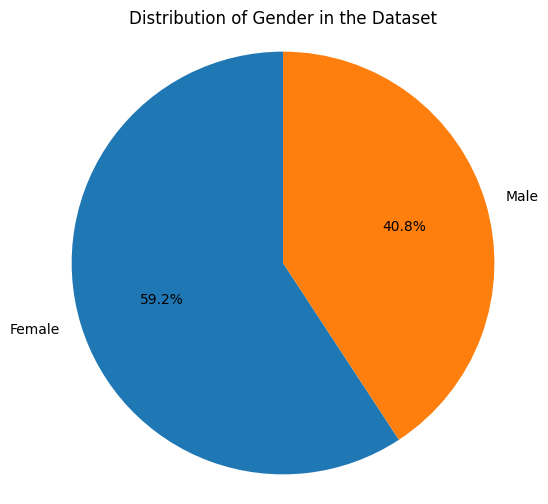

In [17]:
gender_count = profile_df['gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Gender in the Dataset")
plt.axis('equal')

plt

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

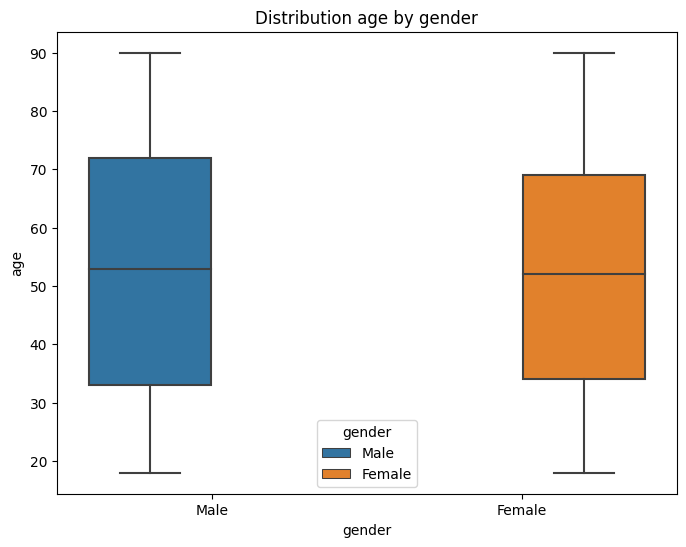

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(y='age', x='gender', data=profile_df, hue='gender')
plt.title('Distribution age by gender')
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

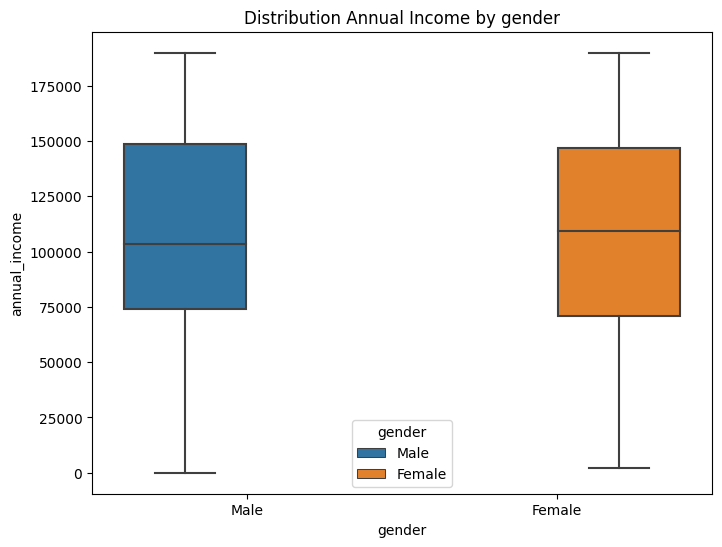

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(y='annual_income', x='gender', data=profile_df, hue='gender')
plt.title('Distribution Annual Income by gender')
sns

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

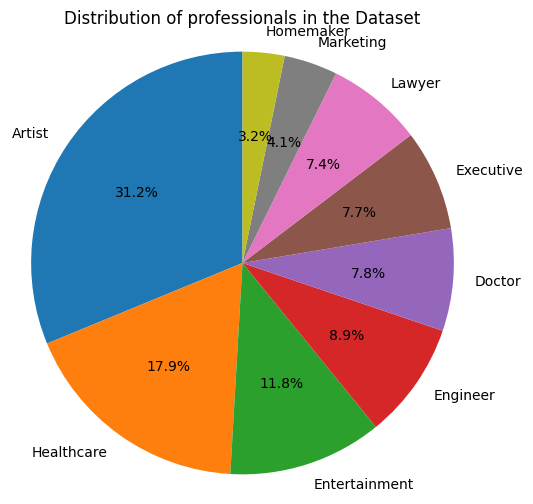

In [19]:
prof_count = profile_df['profession'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(prof_count, labels=prof_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of professionals in the Dataset')
plt.axis('equal')
plt